### Types of Flower Classification

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Paths and Directories

In [2]:
DIRECTORY = r"C:\Users\azwin\OneDrive\Desktop\flower_photos"
CATEGORIES = ['daisy','dandelion','roses','sunflowers','tulips'] 

### Data Preprocessing

In [3]:
IMG_SIZE = 150
data= []

for category in CATEGORIES :
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        if img.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff', 'gif')):
            img_arr = cv2.imread(img_path)
            if img_arr is not None:
                img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                data.append([img_arr, label])
            else:
                print(f"Error loading image: {img_path}")
        else:
            print(f"Skipping non-image file: {img_path}")

In [4]:
random.shuffle(data)
X = np.array([item[0] for item in data], dtype='float32') / 255.0  
y = np.array([item[1] for item in data], dtype='int32')

### Train/Test/split

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<Axes: >

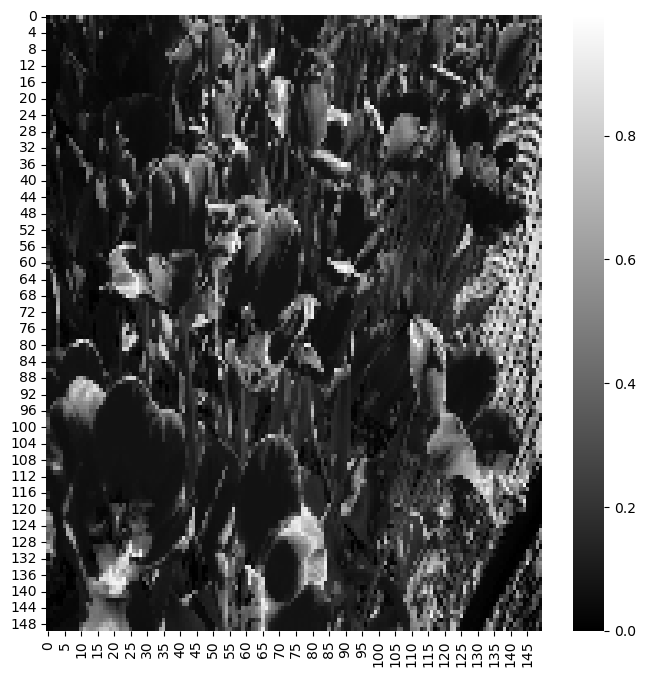

In [6]:


grayscale_image = rgb2gray(X_train[110])  
plt.figure(figsize=(8, 8))
sns.heatmap(grayscale_image, cmap='gray', annot=False)

In [7]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

In [8]:
print(f"Training data: {len(X_train)} samples")
print(f"Validation data: {len(X_val)} samples")
print(f"Test data: {len(X_test)} samples")

Training data: 2569 samples
Validation data: 550 samples
Test data: 551 samples


### Model Training

In [9]:
input_shape = (IMG_SIZE, IMG_SIZE, 3)
model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="softmax")
    
])

C:\Users\azwin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model compiling and fitting

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
history = model.fit(
    X_train, y_train,  
    epochs=60,  
    batch_size=35,  
    validation_data=(X_val, y_val)  
)

Epoch 1/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 487ms/step - accuracy: 0.2390 - loss: 1.6297 - val_accuracy: 0.3909 - val_loss: 1.5701
Epoch 2/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 35s 477ms/step - accuracy: 0.3474 - loss: 1.4927 - val_accuracy: 0.4345 - val_loss: 1.4215
Epoch 3/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 417ms/step - accuracy: 0.4135 - loss: 1.3442 - val_accuracy: 0.4764 - val_loss: 1.3134
Epoch 4/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 405ms/step - accuracy: 0.4572 - loss: 1.2541 - val_accuracy: 0.5055 - val_loss: 1.2848
Epoch 5/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 403ms/step - accuracy: 0.4780 - loss: 1.2098 - val_accuracy: 0.5200 - val_loss: 1.2493
Epoch 6/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 406ms/step - accuracy: 0.5001 - loss: 1.1875 - val_accuracy: 0.4800 - val_loss: 1.2563
Epoch 7/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 419ms/step - accuracy: 0.5101 - loss: 1.1445 - val_accuracy: 0.5600 - val_loss: 1.2078
Epoch 8/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 404ms/step - accuracy: 0.5035 - loss: 1.1975 - val_accu

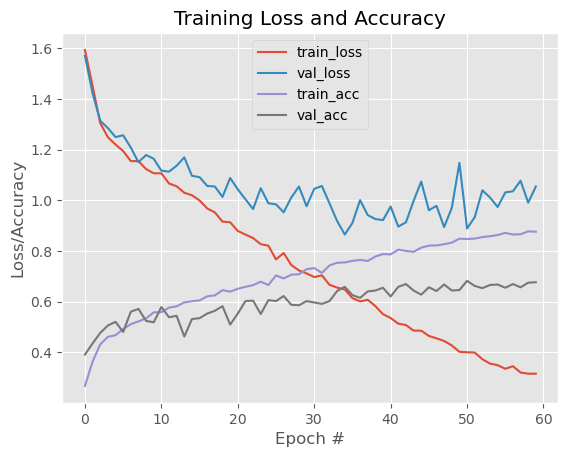

In [12]:
import matplotlib.pyplot as plt
import numpy as np


epochs = 60

# Plotting
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model.history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model.history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model.history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper center")
plt.show()

#### Evaluate the model

In [13]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

18/18 - 1s - 82ms/step - accuracy: 0.6534 - loss: 1.2313
Test Loss: 1.2312990427017212
Test Accuracy: 0.6533575057983398


#### Model predictions

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
Classification Report:
              precision    recall  f1-score   support

       daisy       0.77      0.63      0.69        89
   dandelion       0.56      0.88      0.68       125
       roses       0.67      0.44      0.53       108
  sunflowers       0.86      0.72      0.78       111
      tulips       0.57      0.57      0.57       118

    accuracy                           0.65       551
   macro avg       0.69      0.65      0.65       551
weighted avg       0.68      0.65      0.65       551

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


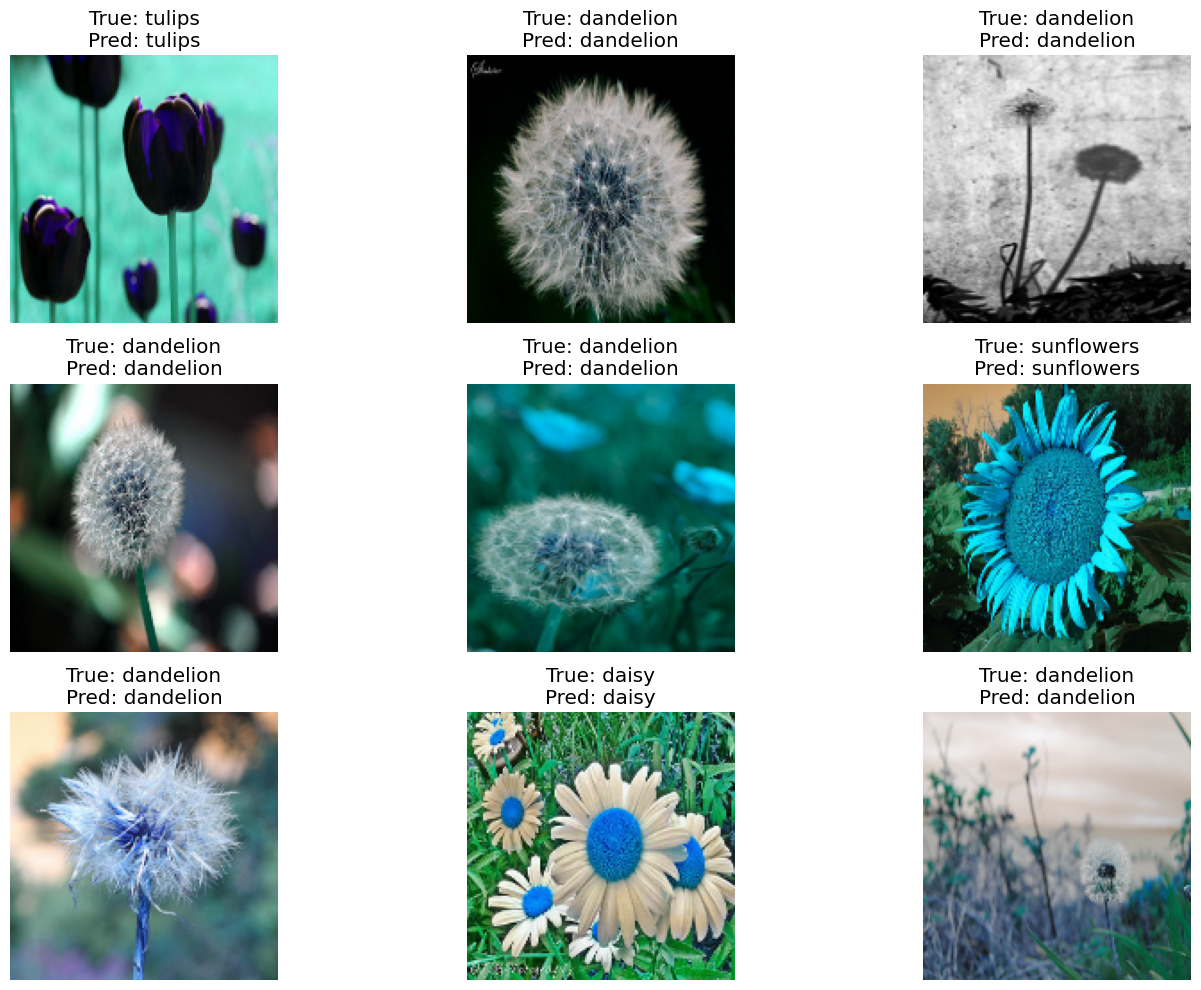

In [16]:
# Generate predictions
from sklearn.metrics import classification_report
predictions = np.argmax(model.predict(X_test), axis=1)
print("Classification Report:")
print(classification_report(y_test, predictions, target_names=CATEGORIES))

def display_predictions(images, labels, start, end):
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(range(start, end + 1), 1):
        if idx < len(images):  # Ensure index is within bounds
            test_image = images[idx]
            img = np.expand_dims(test_image, axis=0)
            prediction = model.predict(img)
            predicted_class_index = np.argmax(prediction, axis=1)[0]
            predicted_label = CATEGORIES[predicted_class_index]
            true_label = CATEGORIES[labels[idx]]

            plt.subplot(3, 3, i)
            plt.imshow(test_image)
            plt.title(f"True: {true_label}\nPred: {predicted_label}")
            plt.axis("off")
        else:
            break  # Stop if index goes out of bounds

    plt.tight_layout()
    plt.show()

display_predictions(X_test, y_test, start=0, end=8) # Adjusted start and end for 9 images

### Model Training using RESNET

In [17]:
# Build the ResNet50 model with transfer learning
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

In [18]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [19]:
# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(CATEGORIES), activation='softmax')(x)  # Use the number of categories


In [22]:
# Create the final model
from tensorflow.keras.models import Model
model1 = Model(inputs=base_model.input, outputs=predictions)

In [23]:
# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Train the model
epochs = 40
batch_size = 32

In [25]:
history = model1.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    
)

Epoch 1/40
81/81 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.2527 - loss: 1.6878 - val_accuracy: 0.3509 - val_loss: 1.5335
Epoch 2/40
81/81 ━━━━━━━━━━━━━━━━━━━━ 74s 920ms/step - accuracy: 0.3304 - loss: 1.5355 - val_accuracy: 0.3600 - val_loss: 1.5196
Epoch 3/40
81/81 ━━━━━━━━━━━━━━━━━━━━ 75s 926ms/step - accuracy: 0.3278 - loss: 1.5245 - val_accuracy: 0.3509 - val_loss: 1.4999
Epoch 4/40
81/81 ━━━━━━━━━━━━━━━━━━━━ 75s 929ms/step - accuracy: 0.3292 - loss: 1.5207 - val_accuracy: 0.3691 - val_loss: 1.4899
Epoch 5/40
81/81 ━━━━━━━━━━━━━━━━━━━━ 76s 933ms/step - accuracy: 0.3631 - loss: 1.4996 - val_accuracy: 0.3436 - val_loss: 1.4809
Epoch 6/40
81/81 ━━━━━━━━━━━━━━━━━━━━ 74s 918ms/step - accuracy: 0.3531 - loss: 1.5054 - val_accuracy: 0.3691 - val_loss: 1.4779
Epoch 7/40
81/81 ━━━━━━━━━━━━━━━━━━━━ 74s 918ms/step - accuracy: 0.3507 - loss: 1.4923 - val_accuracy: 0.4018 - val_loss: 1.4676
Epoch 8/40
81/81 ━━━━━━━━━━━━━━━━━━━━ 75s 926ms/step - accuracy: 0.3584 - loss: 1.4833 - val_accurac

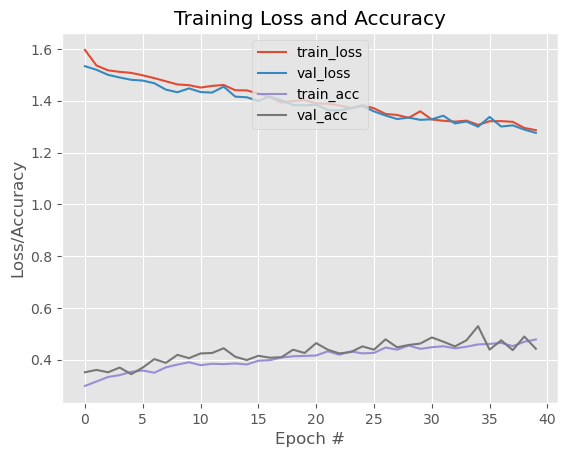

In [26]:
import matplotlib.pyplot as plt
import numpy as np


epochs = 40 

# Plotting
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), model1.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model1.history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model1.history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model1.history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper center")
plt.show()

In [27]:

test_loss, test_accuracy = model1.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")






18/18 - 13s - 703ms/step - accuracy: 0.4392 - loss: 1.2985
Test Loss: 1.2984765768051147
Test Accuracy: 0.4392014443874359


18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 986ms/step
Classification Report:
              precision    recall  f1-score   support

       daisy       0.56      0.49      0.53        89
   dandelion       0.54      0.76      0.63       125
       roses       0.70      0.06      0.12       108
  sunflowers       0.65      0.10      0.17       111
      tulips       0.31      0.72      0.44       118

    accuracy                           0.44       551
   macro avg       0.55      0.43      0.38       551
weighted avg       0.55      0.44      0.38       551

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


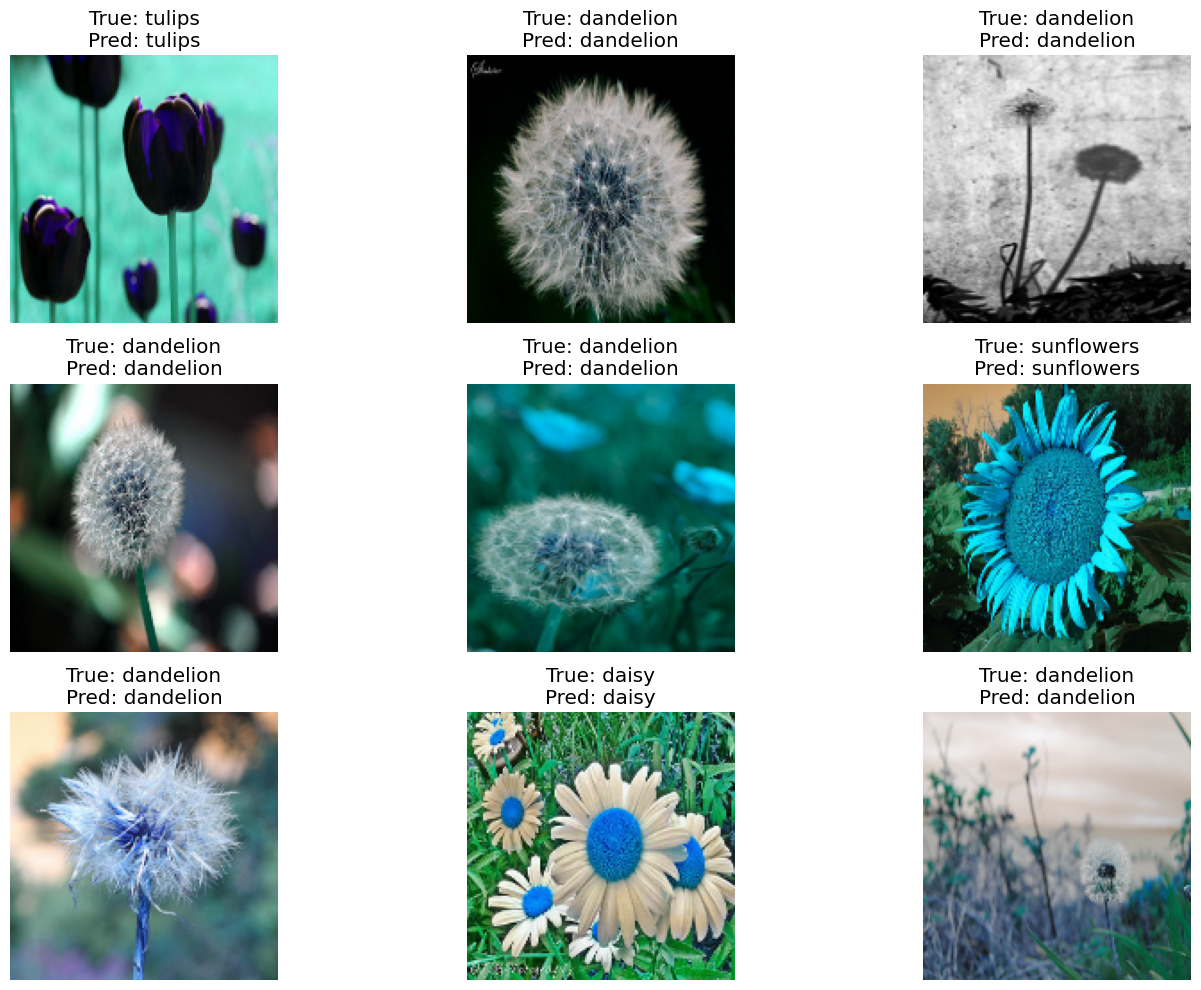

In [28]:
# Generate predictions
from sklearn.metrics import classification_report
predictions = np.argmax(model1.predict(X_test), axis=1)
print("Classification Report:")
print(classification_report(y_test, predictions, target_names=CATEGORIES))

def display_predictions(images, labels, start, end):
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(range(start, end + 1), 1):
        if idx < len(images):  # Ensure index is within bounds
            test_image = images[idx]
            img = np.expand_dims(test_image, axis=0)
            prediction = model.predict(img)
            predicted_class_index = np.argmax(prediction, axis=1)[0]
            predicted_label = CATEGORIES[predicted_class_index]
            true_label = CATEGORIES[labels[idx]]

            plt.subplot(3, 3, i)
            plt.imshow(test_image)
            plt.title(f"True: {true_label}\nPred: {predicted_label}")
            plt.axis("off")
        else:
            break  # Stop if index goes out of bounds

    plt.tight_layout()
    plt.show()

display_predictions(X_test, y_test, start=0, end=8) # Adjusted start and end for 9 images